In [1]:
import pandas
import matplotlib.pyplot as plt
import pathlib
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import pandas
import pathlib
from PIL import Image
import multitasking
import wget
import os
import random
from random import shuffle
from collections import defaultdict
import shutil

In [71]:
train = list(pathlib.Path("dataset/train/facescrub").glob("*/*.[jJpP]*"))
valid = list(pathlib.Path("dataset/valid/facescrub").glob("*/*.[jJpP]*"))

In [72]:
len(train), len(valid)

(6987, 2930)

In [56]:
PARENT_DIR = "dataset/facescrub"

In [58]:
files = list(pathlib.Path(PARENT_DIR).glob("*/*.[jJpP]*"))
len(files)

9917

In [59]:
file_classes = list(map(lambda i: i.parent.name, files))
class_names = set(file_classes)

In [26]:
def group(glob_paths):
    return {x: list(filter(lambda y: y.parent.name == x, glob_paths)) for x in class_names}

def get_random_index(lenght=10, split_ratio=0.3):
    x = [i for i in range(lenght)]
    shuffle(x)
    ratio = int(lenght*split_ratio)
    return x[0:ratio], x[ratio:]


def copy_to(grouped, base_dst):
    for key in grouped.keys():
        data_key = grouped[key]
        for filez in data_key:
            file = filez.name
            dirz = filez.parent.name
            dst_path = os.path.join(base_dst, dirz, file)
            dst_dirz = os.path.join(base_dst, dirz)
            os.makedirs(dst_dirz, exist_ok=True)
            shutil.copy(str(filez), dst_path)
        

    
vidx, tidx = get_random_index(lenght=10, split_ratio=0.3)
len(vidx), len(tidx)

(3, 7)

In [62]:
class_file_counter = Counter(file_classes)
class_counter = np.array(list(class_file_counter.values()))
class_counter_df = pandas.DataFrame.from_records(list(class_file_counter.items()), columns=['class', 'count'])

In [64]:
q1, q3 = np.percentile(class_counter, [25, 75])
median = class_counter_df['count'].median()
iqr = q3-q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 

countlessthanmedian = class_counter_df[class_counter_df['count'] < median]
countlessthanq1 = class_counter_df[class_counter_df['count'] < q1]
countlessthaniqr = class_counter_df[class_counter_df['count'] < iqr]

outliers = list(filter(lambda i: not (lower_bound < i < upper_bound), class_counter))

### Resume JPG only cropped faces

lower_bound(29.375), outliers(), upperbound(176.375)
Total size
Total class(98)
Total class which file counts lower than quartile 1 (Q1 = 84.5) is 25, with aggregate:


,count
count,25.000000
mean,65.200000
std,15.890249
min,36.000000
25%,54.000000
50%,69.000000
75%,78.000000
max,84.000000


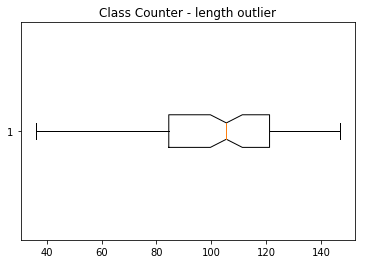

In [65]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Class Counter - length outlier')
ax3.boxplot(class_counter, flierprops=green_diamond, notch=True, vert=False)
print(f'lower_bound({lower_bound}),', f'outliers({", ".join(map(str, outliers))}),', f'upperbound({upper_bound})')
print("Total size")
print(f"Total class({len(class_names)})")
print(f"Total class which file counts lower than quartile 1 (Q1 = {q1}) is {len(countlessthanq1)}, with aggregate:")
countlessthanq1.describe()

# Crop images

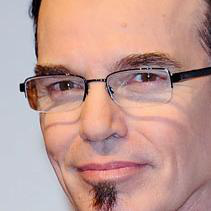

In [67]:
filename = random.choice(files)
Image.open(filename)

In [68]:
grouped = group(files)

In [69]:
train = defaultdict(list)
valid = defaultdict(list)

split= 0.3
for class_ in grouped.keys():
    images = grouped[class_]
    valid_index, train_index = get_random_index(lenght=len(images), split_ratio=split)
    
    for index in valid_index:
        valid[class_].append(images[index])
        
    for index in train_index:
        train[class_].append(images[index])

In [70]:
copy_to(train, 'dataset/train/facescrub')
copy_to(valid, 'dataset/valid/facescrub')